In [1]:
using Pkg
Pkg.add("GaussianProcesses")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %.6 %            ]  69.7 % Resolving package versions...
 Installed CSTParser ── v0.6.1
 Installed Parameters ─ v0.11.0
 Installed DataValues ─ v0.4.12
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
  [00ebfdb7] ↑ CSTParser v0.6.0 ⇒ v0.6.1
  [e7dc6d0d] ↑ DataValues v0.4.11 ⇒ v0.4.12
  [d96e819e] ↑ Parameters v0.10.3 ⇒ v0.11.0


In [2]:
using CSV
using HTTP
using GaussianProcesses
using Plots
using Statistics

┌ Info: Recompiling stale cache file /Users/apple/.julia/compiled/v1.1/GaussianProcesses/izlaf.ji for GaussianProcesses [891a1506-143c-57d2-908e-e1f8e92e6de9]
└ @ Base loading.jl:1184


In [14]:
rbf = SEIso(log(1/sqrt(2)), 0.0)
xs = [1, 2, 3, 4]
cov(rbf, xs, xs)

1.0

In [15]:
xs = reshape([1.0, 2, 3, 4], 1, :)
cov(rbf, xs, xs)

4×4 Array{Float64,2}:
 1.0         0.367879   0.0183156  0.00012341
 0.367879    1.0        0.367879   0.0183156 
 0.0183156   0.367879   1.0        0.367879  
 0.00012341  0.0183156  0.367879   1.0       

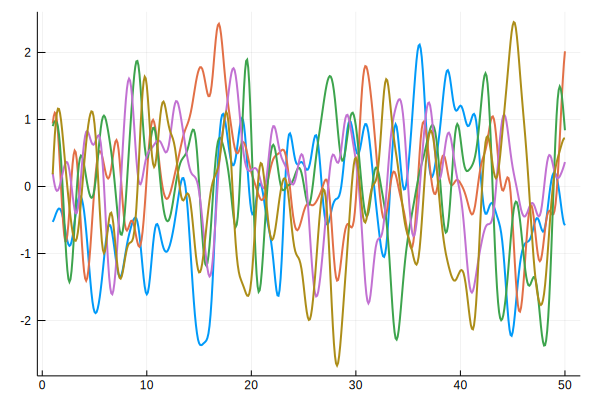

In [30]:
xs = 1:0.1:50
gp_rbf = GPE(kernel = rbf)
samples = rand(gp_rbf, xs, 5)
plot(xs, samples, label = "", lw = 2)

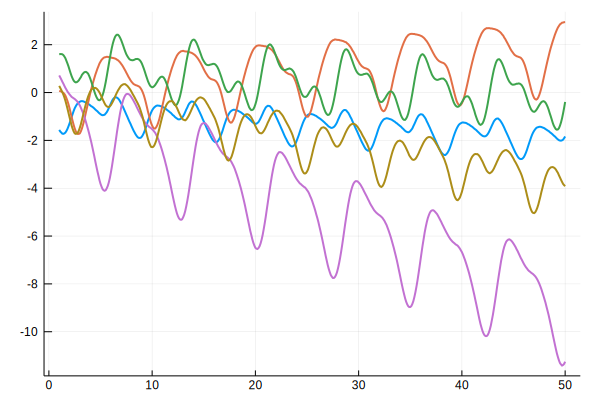

In [68]:
kernel_sum = Lin(2.0) + Periodic(0.0, 0.0, 2.0)
gp_sum = GPE(kernel = kernel_sum)
samples = rand(gp_sum, xs, 5)
plot(xs, samples, label = "", lw = 2)

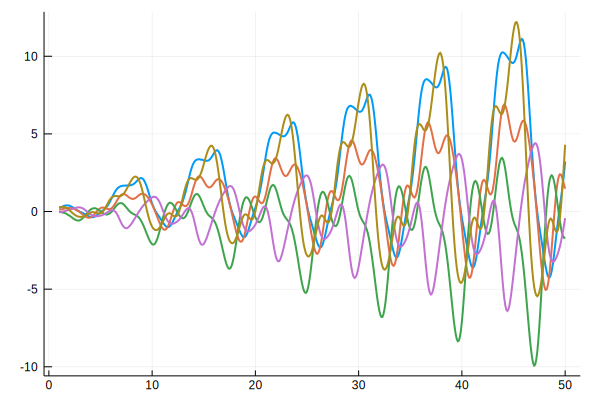

In [69]:
kernel_prod = Lin(2.0) * Periodic(0.0, 0.0, 2.0)
gp_prod = GPE(kernel = kernel_prod)
samples = rand(gp_prod, xs, 5)
plot(xs, samples, label = "", lw = 2)